In [1]:
from ec_mechanism import *
import os
from copy import deepcopy

h2o = [-14.19697643, 0.56792, 0.67]
h2 = [-7.00151164, 0.26849, 0.403]
oer_std_dirlabels = ["star", "OH", "O", "OOH"]
pn_wd="/Users/msokolov/PhD/pentlandites/calc"


def quickcheck_oer_mononuc(probe_dir):
    probe_case = oer_rpbe_d3.auto_read(
        wd=os.path.join(pn_wd, probe_dir),
        dirlabels=oer_std_dirlabels
    )

    fig, ax = plt.subplots()
    probe_case.g_plot_gmax(op=0.3)
    plt.show()

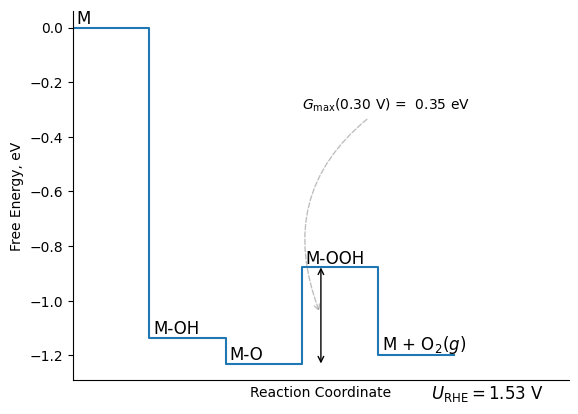

In [9]:
quickcheck_oer_mononuc(os.path.join(pn_wd, "08_oer_pathways/00_19Oref_fe/0_rpbe-d3"))

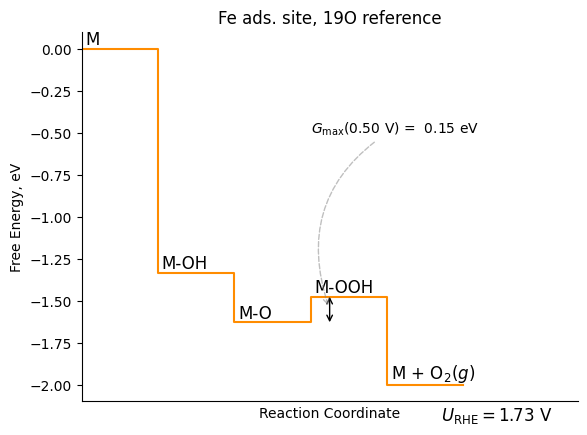

In [39]:
oer_rpbe_d3 = construct_ec_own(oer_mononuc, {"H2O": h2o, "H2": h2})

pn_2xslab_fe = oer_rpbe_d3.auto_read(
    wd=os.path.join(pn_wd, "08_oer_pathways/00_19Oref_fe/0_rpbe-d3"),
    dirlabels=oer_std_dirlabels
)

fig, ax = plt.subplots()
pn_2xslab_fe.g_plot_gmax(op=0.5, trapezo=False, c="darkorange")
plt.title("Fe ads. site, 19O reference")
# plt.savefig("/Users/msokolov/PhD/Figures/pdf/fe_19Oref.pdf")
plt.show()



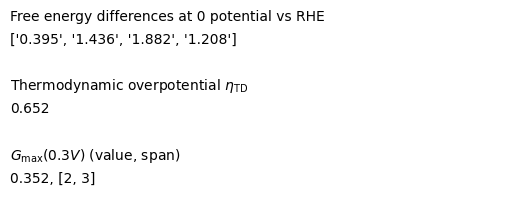

In [38]:
fig, ax = plt.subplots(figsize=(6.4, 2.4))
ax.set_xlim([0, 1])
ax.set_ylim([0.6, 1])
plt.axis('off')
plt.text(0, 1, r"Free energy differences at 0 potential vs RHE")
plt.text(0, 0.95, ["{0:0.3f}".format(i) for i in pn_2xslab_fe.dg])

plt.text(0, 0.85, r"Thermodynamic overpotential $\eta_\mathrm{TD}$")
plt.text(0, 0.80, f"{pn_2xslab_fe.calc_eta_td()[0]:.3f}")

plt.text(0, 0.70, r"$G_\mathrm{max}(0.3V)$ (value, span)")
plt.text(0, 0.65, f"{pn_2xslab_fe.calc_gmax(op=0.3)[0]:.3f}, {pn_2xslab_fe.calc_gmax(op=0.3)[1]}")



plt.show()

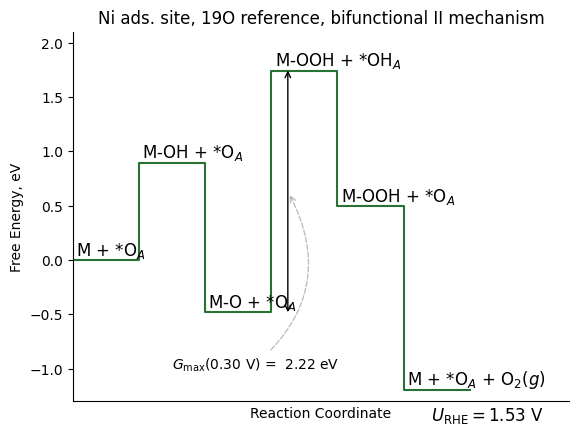

In [3]:
oer_bifunc2 = construct_ec_mechanism(
    # reactants might need to be coded as class attribute instead of instance attribute
    reactants={
        "H2O": {"reac_part": [-1, 0, -1, 0]},
        "H2": {"reac_part": [0.5, 0.5, 0, 0.5]}
    },
    labels=[
        r"M + *O$_A$",
        r"M-OH + *O$_A$",
        r"M-O + *O$_A$",
        r"M-OOH + *OH$_A$",
        r"M-OOH + *O$_A$",
        r"M + *O$_A$ + O$_2(g)$"],
    elchem_steps=[True, True, False, True, True],
    electrode=-1,
    eq_pot=1.23
)

oer_bifuncII_rpbe_d3 = construct_ec_own(oer_bifunc2, {"H2O": h2o, "H2": h2})

ni_bifunc2 = oer_bifuncII_rpbe_d3(
    edft=[-1099.61626619, -1108.30428907, -1104.34057779, -1117.02566717, -1112.87526317],
    zpe=[7.7802192, 8.1619275, 7.921360, 8.5303571, 8.229272]
)

fig, ax = plt.subplots()
# fig.set_size_inches(12, 8)
ni_bifunc2.g_plot_gmax(op=0.3, custom_coord=(1.5, -1), color="#287233")
ax.set_ylim([-1.3, 2.1])
plt.title("Ni ads. site, 19O reference, bifunctional II mechanism")
# plt.savefig("/Users/msokolov/PhD/Figures/pdf/ni_bifuncII.pdf")
plt.show()